In [1]:
# importing usefull libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 

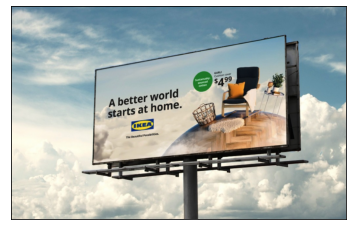

In [5]:
# loading a test image to test the code on
img = cv2.imread("test_bilboard.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

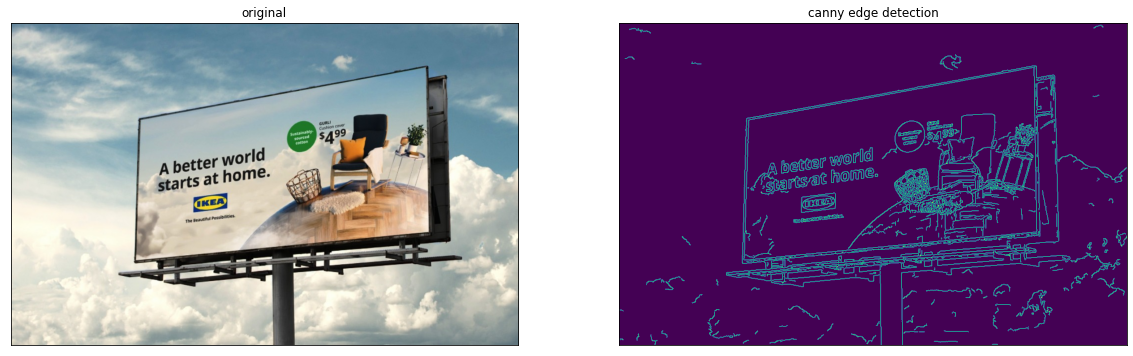

In [20]:
# computing edges using canny edge detector

# values for these will have to be experimentally found for best results
t_lower = 70
t_upper = 120

edge = cv2.Canny(img, t_lower, t_upper)

fig, axs = plt.subplots(1,2, figsize=(20,10))
axs[0].imshow(img)
axs[0].set_title("original")
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].imshow(edge)
axs[1].set_title("canny edge detection")
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.show()

In [70]:
# finding the gradients of the image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = img_gray.astype(float)

# below code convert image gradient in x direction
sobelx= cv2.Sobel(img_gray , cv2.CV_64F, dx=1, dy=0).astype(float)
# sobelx= np.uint8(np.absolute(sobelx))

# below code convert image gradient in y direction
sobely= cv2.Sobel(img_gray, cv2.CV_64F, dx=0, dy=1).astype(float)
# sobely = np.uint8(np.absolute(sobely))


In [83]:
# a gradient direction d_p of each edge pixel p is considered

grad_orientation = np.arctan2(sobely, sobelx) * (180 / np.pi)
grad_magnitude = np.sqrt(sobelx**2 + sobely**2)

# for further use in the loop:

stroke_sobelx = cv2.Sobel(grad_magnitude, cv2.CV_64F, dx=1, dy=0).astype(float)
stroke_sobely = cv2.Sobel(grad_magnitude, cv2.CV_64F, dx=0, dy=1).astype(float)
stroke_grad_orientation = np.arctan2(stroke_sobely, stroke_sobelx) * (180 / np.pi)

In [96]:
# initial val of SWT is set to inf
SWT = np.zeros(img.shape[:2])
SWT[:,:] = np.inf

# for each pixel in the image:
for i, row in enumerate(edge):
    for j, p_val in enumerate(row):
        
        # if its not an edge we skip it
        if p_val != 255:
            continue
        
        # if p lies on the stroke boundary, then d_p must be roughly perpendicular to the direction of the stroke
        d_p = grad_orientation[i,j]
        d_stroke = stroke_grad_orientation[i,j]
        angle = np.abs(np.abs(d_p) - np.abs(d_stroke))
        
        tolerance = 5 # how "roughly" perpendicular it is
        
        if not 90 - tolerance < angle < 90 + tolerance:
            continue
            
        # we follow the ray r = p + n * d_p, n>0 until another edge pixel q is found
        
        # wyznacenie wszystkich pikseli na "linii" r, rozpisać na kartce
        while 
        
        
# TODO jak to sprawdzić????
# czy może skoro już znaleźliśmy strokes, to zadziałać jeszcze raz sobelem na x/y i z tego sprawdzić gradient
# stroke w danym miejscu?


In [97]:
# we follow the ray r = p + n * d_p, n>0 until another edge pixel q is found



# we consider gradient direction of q - d_q

# if it is roughly opposite to d_p each element s of the SWT output image is assigned a value of the width (segment
# p-q) unless it already has a lower value

# if d_q not opposite or q not found, r is discarded


array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

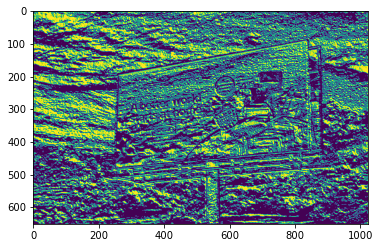

In [67]:
plt.imshow(grad_orient.astype(np.uint8))

In [102]:
test = np.array([[1,2,3],[4,5,6]])
for i, t in enumerate(test):
    for j, t_ in enumerate(t):
        print(i, j)
        print(t, t_)

0 0
[1 2 3] 1
0 1
[1 2 3] 2
0 2
[1 2 3] 3
1 0
[4 5 6] 4
1 1
[4 5 6] 5
1 2
[4 5 6] 6


In [105]:
1 < 4 < 3

False